# Analyzing and Predicting Car Prices in the Australian Market

## 1. Overview of Project

### Objective
Analyze the Australian Car Market dataset to explore insights and build predictive models. The goal is to identify factors influencing car pricing, discover trends and groupings, and recommend the best model for predicting car prices.

### DataBase: [Kagle Link](https://www.kaggle.com/datasets/lainguyn123/australia-car-market-data/data)

### Dataset Details
The dataset has 16 columns with no missing values. Here's a breakdown of its key features:

- Price (Target Variable): Price (The price of the car).
- Numerical Features: Year, Kilometers (Mileage), CC (Engine Capacity), and Seating Capacity.
- Categorical Features: Brand, Variant, Series, Type, Gearbox, Fuel, Status (Car Condition), and Color.

In [2]:
import pandas as pd

# Load the dataset to understand its structure
cars_data = pd.read_csv('cars_info.csv')

# Display basic information about the dataset
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 2.1+ MB


In [3]:
# Check the shape of dataset
cars_data.shape

(17048, 16)

In [4]:
# Show the 5 first lines of the dataset
cars_data.head()

,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


### Key Questions
- What factors most influence car prices?
- Can we predict car prices using regression models?
- Are there specific clusters or classification of cars based on attributes?

## 2. Exploratory Data Analysis (EDA)
Conduct a thorough analysis to uncover patterns and relationships in the data:

### Data Cleaning:
- Check for spaces from all object (string) columns.
- Check for duplicate records and remove them if necessary.
- Drop irrelevant columns (e.g., ID, Name, Model, Variant, etc).
- Rename columns for better clarity.
- Handling incorrect or redundant values (e.g., Brand, Type, Gearbox, Fuel, etc).

In [7]:
# Strip leading and trailing spaces from all object (string) columns
cleaned_data = cars_data.copy()
cleaned_data.loc[:, cleaned_data.select_dtypes(include=['object']).columns] = cleaned_data.select_dtypes(include=['object']).apply(lambda col: col.str.strip())

# Example: Verify changes in the 'Status' column
print(cleaned_data["Status"].unique())

['Used' 'New In Stock' 'Demo']


In [8]:
# Check if there are duplicated data
cleaned_data.duplicated().sum()

0

In [9]:
# Drop irrelevant columns (e.g., ID, Name, Model, Variant, Series, Color)
cleaned_data = cleaned_data.drop(columns=["ID", "Name", "Model", "Variant", "Series", "Color"])
print(cleaned_data.columns)

Index(['Price', 'Brand', 'Year', 'Kilometers', 'Type', 'Gearbox', 'Fuel',
       'Status', 'CC', 'Seating Capacity'],
      dtype='object')


In [10]:
# Rename columns for better clarity
cleaned_data.rename(
    columns = {"Kilometers": "Mileage", "CC": "Engine Capacity", "Status": "Car Condition"}, inplace = True
)
print(cleaned_data.columns)

Index(['Price', 'Brand', 'Year', 'Mileage', 'Type', 'Gearbox', 'Fuel',
       'Car Condition', 'Engine Capacity', 'Seating Capacity'],
      dtype='object')


In [11]:
# Count the number of cars for each Brand and sort by Brand name
brand_counts = cleaned_data['Brand'].value_counts().sort_index()
print(brand_counts)

Brand
Abarth                5
Alfa Romeo           11
Aston Martin          2
Audi                518
BMW                 480
Bentley               7
Chery                 2
Chevrolet             7
Chrysler             42
Citroen              13
Cupra                 5
Dodge                14
FPV                   2
Fiat                 17
Ford               1490
Foton                 4
GWM                  29
Genesis               1
Great Wall           27
HSV                  37
Haval                 7
Hino                  1
Holden             1505
Honda               413
Hyundai            1087
Infiniti              9
Isuzu               267
Iveco                 1
Jaguar               38
Jeep                379
Kia                 744
LDV                 122
Lamborghini           3
Land Rover          273
Lexus               180
MG                   97
Mahindra              1
Maserati              8
Mazda              1167
Mercedes-Benz       625
Mini                 66
Mitsubishi

In [12]:
# Standardize the 'Brand' column: Combine "Mitsubishi Fuso" into "Mitsubishi"
cleaned_data['Brand'] = cleaned_data['Brand'].replace("Mitsubishi Fuso", "Mitsubishi")

In [13]:
# Count the number of cars for each Type and sort by Type name
type_counts = cleaned_data['Type'].value_counts().sort_index()
print(type_counts)

Type
Blind Van                   2
Bus                        21
Cab Chassis               424
Cab Chassis Tray            1
Cabriolet                  35
Club Cab Chassis            5
Club Cab Pickup             3
Club Cab Utility            3
Coach                       4
Coil Cab Chassis            3
Convertible                44
Coupe                     471
Crew Cab Chassis           77
Crew Cab Pickup           269
Crew Cab Utility          207
Crew Cab Van                1
Crew Van                    5
Double Cab Chassis         95
Double Cab Pick Up        425
Double Cab Utility        212
Dual Cab Chassis           72
Dual Cab Pick-up          423
Dual Cab Utility          657
Estate                      4
Fastback                   36
Freestyle Cab Chassis      11
Freestyle Utility           3
Hardtop                    36
Hatchback                2424
King Cab Pick Up            1
King Cab Pickup             8
King Cab Utility            1
Leaf Cab Chassis            4
Liftb

In [14]:
# Standardize the 'Type' column:

# Group similar types into broader categories:
    # Combine terms like "Crew Cab Pickup" and "Double Cab Pick Up" into "Pickup."
    # Combine "Hatchback," "Liftback," and similar compact designs into "Hatchback."
    # Combine all "Van"-related terms into "Van."
    # Simplify luxury or sports designs like "Cabriolet," "Convertible," etc., into a broader "Sports/Convertible" category.

# Mapping for standardizing the 'Type' column
type_mapping = {
    "Blind Van": "Van",
    "Bus": "Van",
    "Cab Chassis": "Utility",
    "Cab Chassis Tray": "Utility",
    "Cabriolet": "Sports/Convertible",
    "Club Cab Chassis": "Utility",
    "Club Cab Pickup": "Pickup",
    "Club Cab Utility": "Utility",
    "Coach": "Van",
    "Coil Cab Chassis": "Utility",
    "Convertible": "Sports/Convertible",
    "Coupe": "Sports/Convertible",
    "Crew Cab Chassis": "Utility",
    "Crew Cab Pickup": "Pickup",
    "Crew Cab Utility": "Utility",
    "Crew Cab Van": "Van",
    "Crew Van": "Van",
    "Double Cab Chassis": "Utility",
    "Double Cab Pick Up": "Pickup",
    "Double Cab Utility": "Utility",
    "Dual Cab Chassis": "Utility",
    "Dual Cab Pick-up": "Pickup",
    "Dual Cab Utility": "Utility",
    "Estate": "Hatchback",
    "Fastback": "Hatchback",
    "Freestyle Cab Chassis": "Utility",
    "Freestyle Utility": "Utility",
    "Hardtop": "Sports/Convertible",
    "Hatchback": "Hatchback",
    "King Cab Pick Up": "Pickup",
    "King Cab Pickup": "Pickup",
    "King Cab Utility": "Utility",
    "Leaf Cab Chassis": "Utility",
    "Liftback": "Hatchback",
    "Panel Van": "Van",
    "Pickup": "Pickup",
    "Roadster": "Sports/Convertible",
    "Saloon": "Sedan",
    "Sedan": "Sedan",
    "Softback": "Sports/Convertible",
    "Softtop": "Sports/Convertible",
    "Space Cab Chassis": "Utility",
    "Space Cab Pickup": "Pickup",
    "Space Cab Utility": "Utility",
    "Sportback": "Hatchback",
    "Sportswagon": "Wagon",
    "Super Cab Chassis": "Utility",
    "Super Cab Pickup": "Pickup",
    "Super Cab Utility": "Utility",
    "Troop Carrier": "Utility",
    "Utility": "Utility",
    "Van": "Van",
    "Wagon": "Wagon",
    "X Cab Cab Chassis": "Utility",
    "X Cab Pickup": "Pickup",
    "X Cab Utility": "Utility"
}

# Apply the mapping to the 'Type' column
cleaned_data['Type'] = cleaned_data['Type'].map(type_mapping)

In [15]:
# Count the number of cars for each Type and sort by Type name
type_counts = cleaned_data['Type'].value_counts().sort_index()
print(type_counts)

Type
Hatchback             2547
Pickup                1153
Sedan                 2338
Sports/Convertible     635
Utility               2046
Van                    418
Wagon                 7911
Name: count, dtype: int64


In [16]:
# Count the number of cars for each Gearbox and sort by Gearbox name
gearbox_counts = cleaned_data['Gearbox'].value_counts().sort_index()
print(gearbox_counts)

Gearbox
AWD             13
Automatic    14578
Front            8
Manual        2446
Rear             3
Name: count, dtype: int64


In [17]:
# Standardize the 'Gearbox' column:

# Group similar types into broader categories:
    # Combine ambiguous terms like "AWD," "Front," and "Rear" into "Other."
    # Keep the most meaningful categories like "Automatic" and "Manual."

# Mapping for standardizing the 'Gearbox' column
gearbox_mapping = {
    "AWD": "Other",
    "Automatic": "Automatic",
    "Front": "Other",
    "Manual": "Manual",
    "Rear": "Other"
}

# Apply the mapping to the 'Gearbox' column
cleaned_data['Gearbox'] = cleaned_data['Gearbox'].map(gearbox_mapping)    

In [18]:
# Count the number of cars for each Fuel and sort by Fuel name
fuel_counts = cleaned_data['Fuel'].value_counts().sort_index()
print(fuel_counts)

Fuel
Diesel                       6087
Diesel/Electric                18
Liquid Petroleum Gas           40
Premium Unleaded Petrol      3438
Premium Unleaded/Electric     194
Unleaded Petrol              7016
Unleaded Petrol/Electric      255
Name: count, dtype: int64


In [19]:
# Standardize the 'Fuel' column:

# Group similar types into broader categories:
    # Combine Hybrid Options: Group any fuel type with /Electric into a broader category like Hybrid.
    # Simplify Gas Types:
        # Combine Premium Unleaded Petrol and Unleaded Petrol into Petrol.
        # Group Liquid Petroleum Gas into a single LPG category.
    # Keep Diesel Separate: As it's distinct and common, retain Diesel as its category.

# Mapping for standardizing the 'Fuel' column
fuel_mapping = {
    "Diesel": "Diesel",
    "Diesel/Electric": "Hybrid",
    "Liquid Petroleum Gas": "LPG",
    "Premium Unleaded Petrol": "Petrol",
    "Premium Unleaded/Electric": "Hybrid",
    "Unleaded Petrol": "Petrol",
    "Unleaded Petrol/Electric": "Hybrid"
}

# Apply the mapping to the 'Fuel' column
cleaned_data['Fuel'] = cleaned_data['Fuel'].map(fuel_mapping)

# Verify the standardized categories
#standardized_fuel = cleaned_data['Fuel'].value_counts().sort_index()
#print(standardized_fuel)

In [20]:
# Count the number of cars for each Car Condition and sort by Car Condition name
condition_counts = cleaned_data['Car Condition'].value_counts().sort_index()
print(condition_counts)

Car Condition
Demo              387
New In Stock      357
Used            16304
Name: count, dtype: int64


In [21]:
# Standardize the 'Car Condition' column:

# Mapping for standardizing the 'Car Condition' column
car_condition_mapping = {
    "Demo": "New",
    "New In Stock": "New",
    "Used": "Used"
}

# Apply the mapping to the 'Car Condition' column
cleaned_data['Car Condition'] = cleaned_data['Car Condition'].map(car_condition_mapping)

### Descriptive Statistics:
- Summary statistics for numerical features (mean, median, range, standard deviation).
- Frequency counts for categorical features (e.g., number of cars by brand, fuel type).

In [23]:
# Set pandas to display floats with two decimal places
import pandas as pd
pd.options.display.float_format = "{:.2f}".format

# Summary statistics for numerical features
cleaned_data.describe()

,Price,Year,Mileage,Engine Capacity,Seating Capacity
count,17048.00,17048.00,17048.00,17048.00,17048.00
mean,36777.78,2015.48,103231.40,2491.83,5.12
std,30305.02,4.72,80413.13,881.99,1.12
min,1000.00,1989.00,1.00,875.00,2.00
25%,18800.00,2013.00,44502.25,1987.00,5.00
50%,29990.00,2016.00,88454.00,2354.00,5.00
75%,45990.00,2019.00,148873.50,2981.00,5.00
max,999000.00,2022.00,2700000.00,7300.00,14.00


In [24]:
# Select categorical features
categorical_featur = cleaned_data.select_dtypes(include=["object"]).columns

# Loop through each categorical feature
for feat in categorical_featur:
    print(f"\nFeature: {feat}")
    # Calculate absolute and relative frequencies
    value_counts = cleaned_data[feat].value_counts()
    percentages = cleaned_data[feat].value_counts(normalize=True) * 100
    
    # Combine the results and display them
    summary = pd.DataFrame({'Absolute': value_counts, 'Relative (%)': percentages})
    print(summary)



Feature: Brand
               Absolute  Relative (%)
Brand                                
Toyota             2768         16.24
Holden             1505          8.83
Ford               1490          8.74
Mazda              1167          6.85
Hyundai            1087          6.38
Mitsubishi         1075          6.31
Volkswagen         1019          5.98
Nissan             1008          5.91
Kia                 744          4.36
Subaru              655          3.84
Mercedes-Benz       625          3.67
Audi                518          3.04
BMW                 480          2.82
Honda               413          2.42
Jeep                379          2.22
Land Rover          273          1.60
Isuzu               267          1.57
Lexus               180          1.06
Volvo               161          0.94
Skoda               160          0.94
Suzuki              160          0.94
Renault             158          0.93
LDV                 122          0.72
MG                   97          0

## Feature Transformation:   
- Scale numerical features (e.g., Price, Mileage, Engine Capacity, Seating Capacity) using StandardScaler for Visualizations and Models. 

In [26]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for standardization
numerical_columns = ['Price', 'Year', 'Mileage', 'Engine Capacity', 'Seating Capacity']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical data
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])

# Check the transformed data
cleaned_data.head()

,Price,Brand,Year,Mileage,Type,Gearbox,Fuel,Car Condition,Engine Capacity,Seating Capacity
0,-0.88,Toyota,-1.16,1.99,Wagon,Automatic,Petrol,Used,-0.15,-0.10
1,2.68,Mercedes-Benz,1.17,-1.28,Wagon,Automatic,Diesel,New,-0.40,1.68
2,1.43,Mercedes-Benz,1.17,-1.28,Wagon,Automatic,Diesel,New,-0.40,2.57
3,-0.06,Mercedes-Benz,-1.16,0.22,Sports/Convertible,Automatic,Diesel,Used,-0.40,-0.99
4,-0.69,Holden,0.11,-0.38,Wagon,Automatic,Petrol,Used,-0.79,-0.10


## Data Visualization:
- Boxplots to identify outliers in Price, Mileage and Engine Capacity.
- Remove or cap outliers (e.g., extremely high or low prices or mileage).
- Heatmap of correlations to explore relationships between numerical variables like Year, Mileage, Engine Capacity, Seating Capacity and Price.
- Scatterplots (e.g., Year vs. Price, Mileage vs. Price, Engine Capacity vs. Price, Seating Capacity vs. Price) to visualize trends.

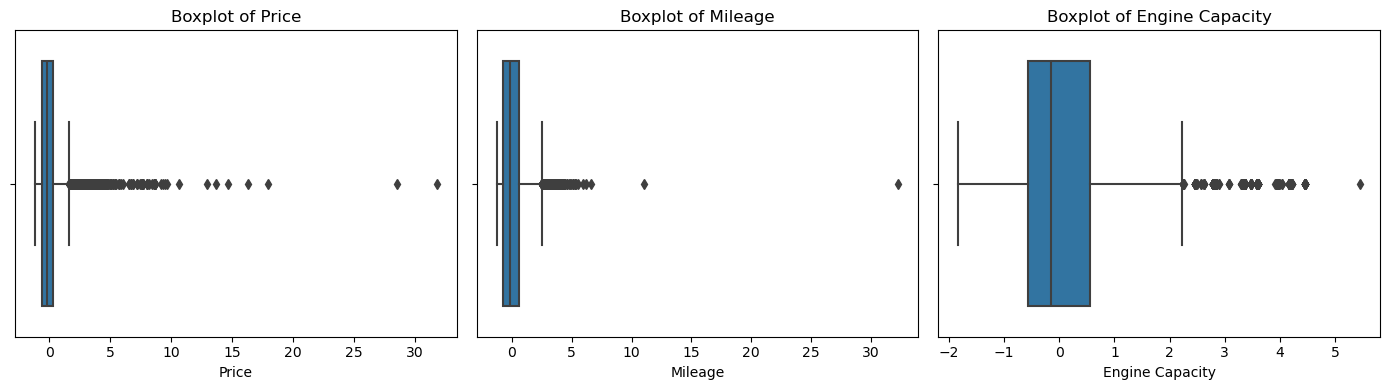

In [28]:
# Boxplots for numerical variables to identify outliers

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns (excluding Year and Seating Capacity)
numer_columns = ['Price', 'Mileage', 'Engine Capacity']

# Set up the figure with 1 row and 3 columns (to fit the 3 plots)
plt.figure(figsize=(14, 4)) 

# Loop through the numerical columns and create a boxplot for each one
for i, col in enumerate(numer_columns):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, current plot index
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

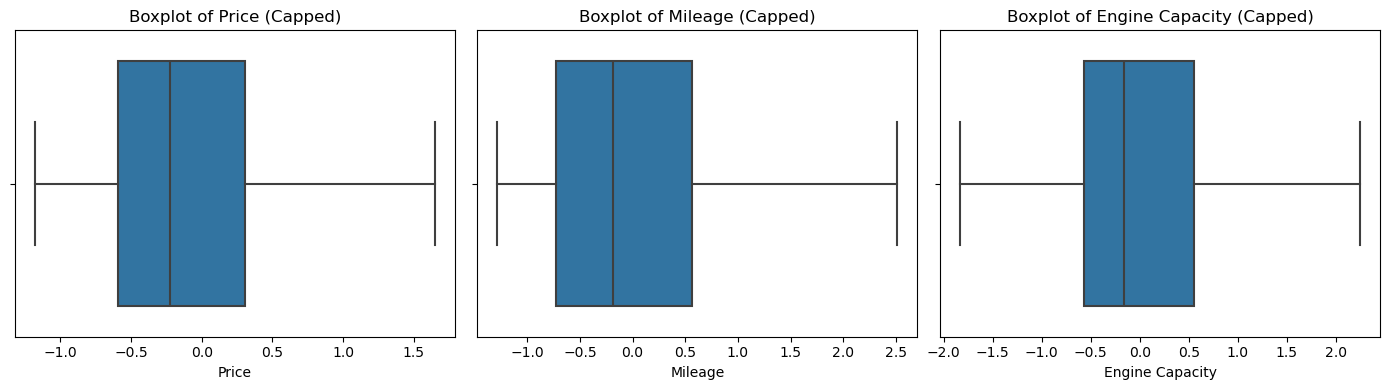

In [29]:
# Remove or Cap outliers

# Function to cap outliers
def cap_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df

# Cap outliers for the numerical columns (Price, Mileage, Engine Capacity)
for col in numer_columns:
    cleaned_data = cap_outliers(cleaned_data, col)

# Set up the figure with 1 row and 3 columns
plt.figure(figsize=(14, 4))  # 3 graphs in 1 row, reduced height

# Loop through the numerical columns and create a boxplot for each one
for i, col in enumerate(numer_columns):
    plt.subplot(1, 3, i + 1)  # 1 row, 3 columns, current plot index
    sns.boxplot(x=cleaned_data[col])
    plt.title(f"Boxplot of {col} (Capped)")

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
# Save the DataFrame to a CSV file
#cleaned_data.to_csv('cleaned_car_data.csv', index=False)

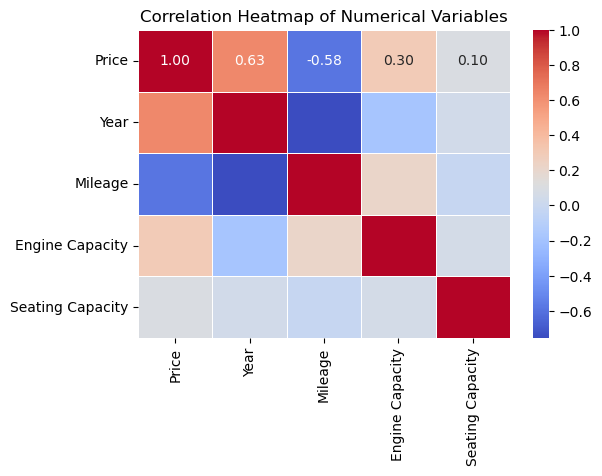

In [31]:
# Heatmap of correlations
# Calculate the correlation matrix
correlation_matrix = cleaned_data[numerical_columns].corr()

# Set up the figure
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Variables')

# Show the plot
plt.show()

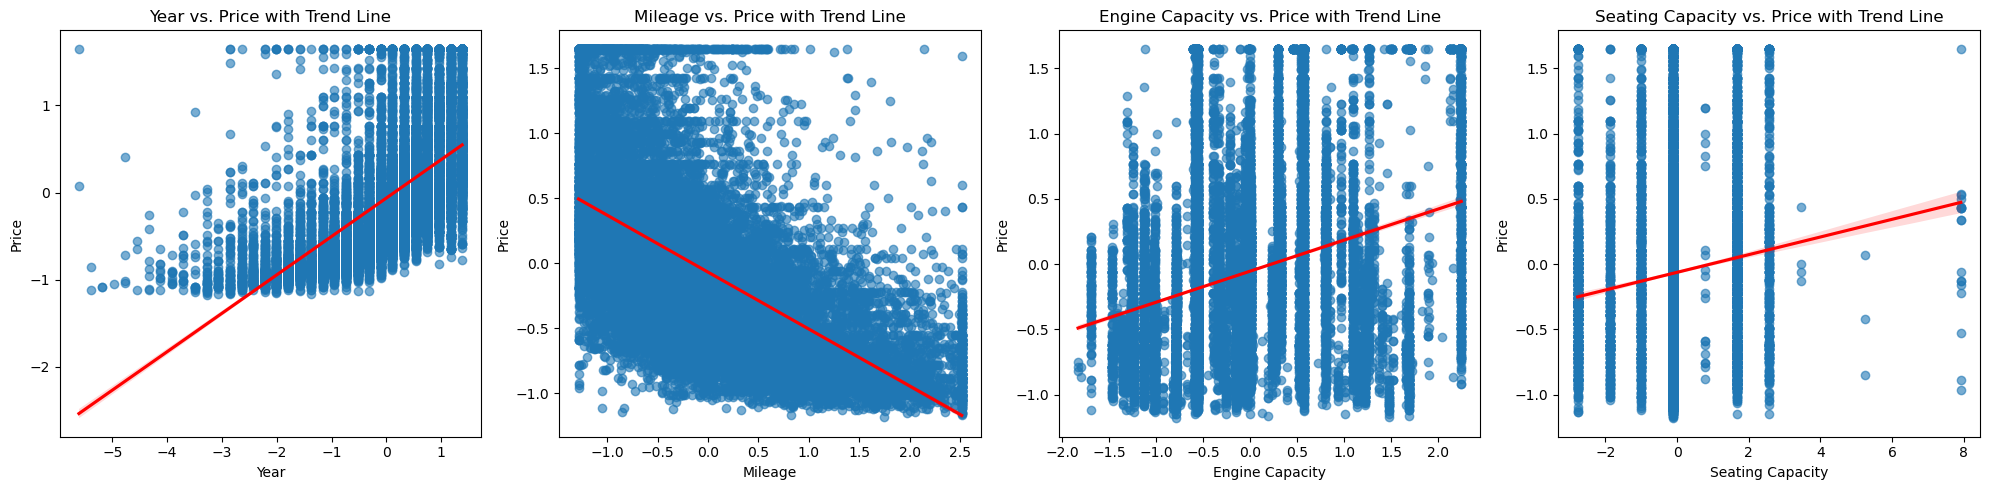

In [32]:
# Scatterplots with a Trend Line

# List of numerical columns to plot against Price
features = ['Year', 'Mileage', 'Engine Capacity', 'Seating Capacity']

# Set up the figure with 1 row and 4 columns
plt.figure(figsize=(20, 5))

# Loop through the features and create a scatterplot with a trend line for each
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)  # 1 row, 4 columns, current plot index
    sns.regplot(data=cleaned_data, x=feature, y='Price', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f"{feature} vs. Price with Trend Line")
    plt.xlabel(feature)
    plt.ylabel("Price")

# Adjust layout
plt.tight_layout()
plt.show()

### Insights:
#### Features with the Strongest Correlation to Car Price:
- Year: Has a moderate positive correlation with Price (~0.63), suggesting newer cars tend to cost more.
- Mileage: Shows a negative correlation with Price (~ -0.58), indicating that higher mileage generally reduces a car's value.

#### Notable Trends:
- Year vs. Price: The scatterplot shows a clear positive trend—newer cars are generally priced higher, as shown by the upward-sloping trend line.
- Mileage vs. Price: Higher mileage corresponds to lower prices, confirmed by the negative slope of the trend line.
- Engine Capacity vs. Price: The correlation is weaker (~0.30), but the trend line indicates that larger engine capacities are often associated with higher prices.
- Seating Capacity vs. Price: Correlation is weak (~0.10), but there is a slight positive trend, showing that cars with higher seating capacity might cost slightly more.

#### Summary
- Year and Mileage are key features for predicting car prices due to their strong correlation with Price.
- Engine Capacity and Seating Capacity show weaker relationships but can still contribute to price variability.

## 3. Model 1: Clustering
### Objective::
- Group cars based on similar attributes to identify distinct segments.
### Features for Clustering:
- Select relevant features: Mileage, Car Condition, Year, Price, and Fuel.
    - These features will be used to form the clusters, and K-Means will try to group cars that have similar values in these features.
- Convert categorical variables (e.g., Fuel, Car Condition) into dummy/encoded variables.

In [35]:
# Importing libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select features for clustering
selected_features = ['Mileage', 'Car Condition', 'Year', 'Price', 'Fuel']

# Prepare data:
# Extract the numerical columns (already normalized)
numerical_data = cleaned_data[['Mileage', 'Year', 'Price']]  # Assuming these are normalized already

# Create dummy variables for categorical columns ('Car Condition' and 'Fuel')
dummy_data = pd.get_dummies(cleaned_data[['Car Condition', 'Fuel']], drop_first=True)

# Ensure that only dummy variables are converted to integers
dummy_data = dummy_data.astype(int)

# Combine the numerical data with the dummy variables
processed_data = pd.concat([numerical_data, dummy_data], axis=1)

### Clustering Algorithm:
- Determine the optimal number of clusters (k) using the Elbow Method.
- Use K-Means Clustering.

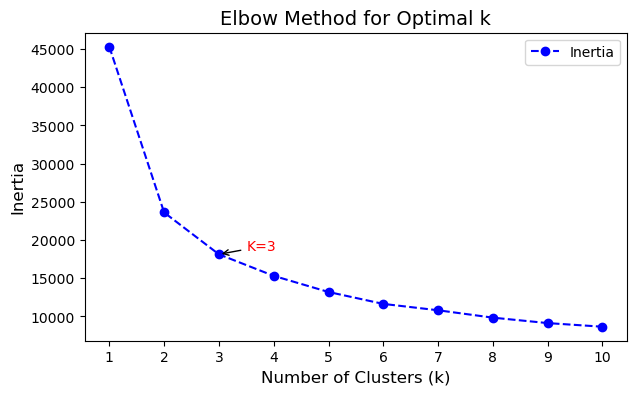

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal number of clusters (Elbow Method)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(7, 4))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)

# Ensure x-axis ticks show every value in k_range
plt.xticks(ticks=k_range, fontsize=10)  # Force ticks for each k value
plt.yticks(fontsize=10)

# Annotate k=3 explicitly
k_selected = 3
plt.annotate(f'K={k_selected}', 
             xy=(k_selected, inertia[k_selected-1]), 
             xytext=(k_selected + 0.5, inertia[k_selected-1] + 500),  # Adjust annotation position
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10, color='red')

# Display legend
plt.legend(fontsize=10)
plt.show()

# Plot the Elbow Curve:
    # Plot the inertia against the number of clusters k
    # As k increases, inertia will decrease. However, the goal is to find the point where the decrease in inertia starts to slow down and form an 
    #"elbow" in the curve. This point indicates the optimal number of clusters.
# Choose the Optimal k:
    # The "elbow" point is where inertia starts to level off. The optimal number of clusters is typically chosen at this point because increasing k
    # further doesn’t provide significant improvements.

In [38]:
# Apply K-Means with the optimal number of clusters
optimal_k = 3  # Based on the elbow method plot, maybe 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(processed_data)

# Add cluster labels directly to processed_data
processed_data['Cluster'] = clusters

# Display the first few rows to verify the result
#print(processed_data.head())

### Output:
- Visualize clusters with scatter plots (e.g., Kilometers vs. Price).
- Analyze cluster characteristics    

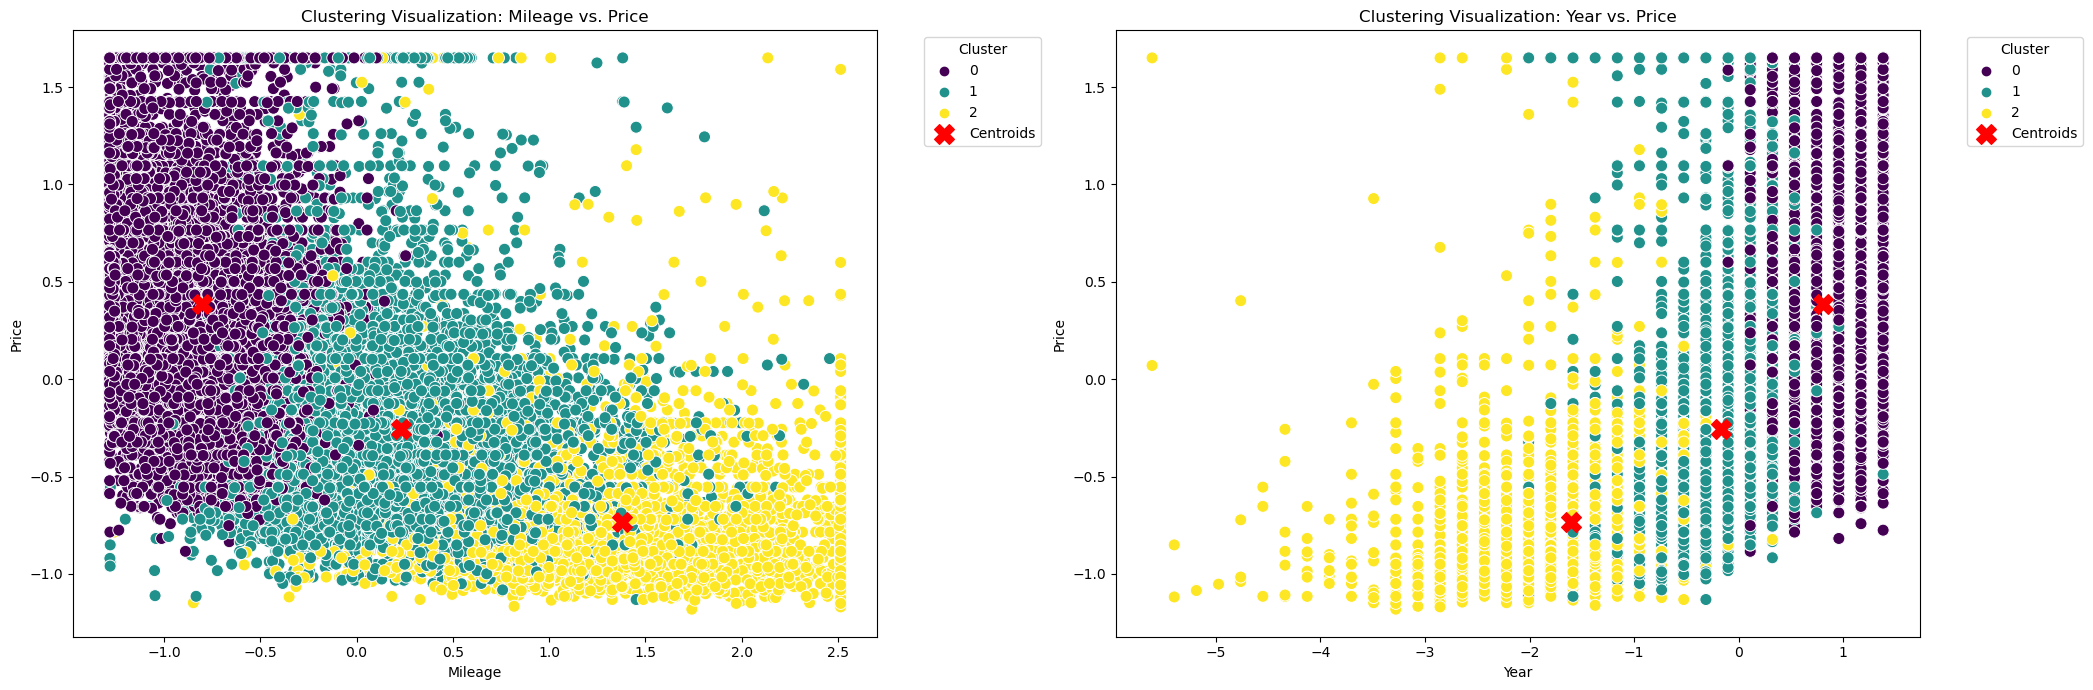

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming you have already fit a KMeans model and have 'processed_data' with 'Cluster' labels

# Visualize clusters for continuous features vs. Price (e.g., Mileage, Year)
plot_features = ['Mileage', 'Year']  # Continuous features to compare against Price
plt.figure(figsize=(21, 7))  # Adjust width for multiple plots in a row

# Fit KMeans if not already done
kmeans = KMeans(n_clusters=3, random_state=42)
processed_data['Cluster'] = kmeans.fit_predict(processed_data[['Mileage', 'Year']])

# Get the centroids
centroids = kmeans.cluster_centers_

for i, feature in enumerate(plot_features):
    plt.subplot(1, len(plot_features), i + 1)
    sns.scatterplot(data=processed_data, x=feature, y='Price', hue='Cluster', palette='viridis', s=75)
    
    # Plot centroids
    plt.scatter(centroids[:, i], [processed_data[processed_data['Cluster'] == j]['Price'].mean() for j in range(len(centroids))], 
                color='red', marker='X', s=200, label='Centroids')
    
    plt.title(f'Clustering Visualization: {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend placement

plt.tight_layout()
plt.show()


In [41]:
# Adjust pandas display settings
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)       # Set a wider display width

# Cluster characteristics
cluster_analysis = processed_data.groupby('Cluster')[['Price', 'Mileage', 'Year', 'Fuel_Hybrid',
                                                      'Fuel_LPG', 'Fuel_Petrol', 'Car Condition_Used']].mean()

print("Cluster Analysis (Mean Values):\n")
print(cluster_analysis)

Cluster Analysis (Mean Values):

         Price  Mileage  Year  Fuel_Hybrid  Fuel_LPG  Fuel_Petrol  Car Condition_Used
Cluster                                                                              
0         0.39    -0.80  0.81         0.06      0.00         0.63                0.90
1        -0.26     0.23 -0.17         0.01      0.00         0.57                1.00
2        -0.73     1.38 -1.60         0.00      0.01         0.67                1.00


### Insights:
- How do clusters align with pricing and features?
    - Cluster 0 (Higher Price):
        - Price: Higher than average (mean price = 0.61).
        - Mileage: Lower than average, indicating less wear and tear (-0.86).
        - Year: Recent cars (0.89), implying newer models.
        - Fuel: Significant proportion of petrol cars (55%) and some hybrid vehicles (7%).
        - Condition: Mostly used cars (87%).
    - Cluster 1 (Lower Price):
        - Price: Lowest among all clusters (-0.72).
        - Mileage: High, indicating older or heavily used cars (1.24).
        - Year: Much older models (-1.42).
        - Fuel: Predominantly petrol cars (67%), with minimal LPG presence.
        - Condition: All cars in this cluster are used (100%).
    - Cluster 2 (Mid Price):
        - Price: Around the average (-0.26).
        - Mileage: Near-average mileage (0.01), likely representing balanced usage.
        - Year: Moderately old cars (0.02).
        - Fuel: Predominantly petrol cars (63%), with a small fraction of hybrids.
        - Condition: Entirely used cars (100%).       
- What actionable insights can dealerships derive from these segments?
    - Cluster 0 (Higher Price):
        - Represents premium cars, and very new with low mileage.
    - Cluster 1 (Lower Price):
        - Represents budget cars, mostly used, regardless of age or mileage.
    - Cluster 2 (Mid Price):
        - Represents mid-range cars with balanced options (reasonable pricing, average mileage, moderately old). 

## 4. Model 2: Regression
### Objective:
- Predict car prices based on features.
### Features for Clustering:
- Select relevant features: Price, Year, Mileage, Engine Capacity, Seating Capacity, Type, Gearbox, Fuel, Car Condition.
- Convert categorical variables (e.g., Fuel, Car Condition) into dummy/encoded variables.

In [44]:
# Install the xgboost library:
!pip install xgboost

In [45]:
# Import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# Features for regression
categorical_features = ['Type', 'Gearbox', 'Fuel', 'Car Condition']
numerical_features = ['Year', 'Mileage', 'Engine Capacity', 'Seating Capacity']
target = 'Price'

# Separate features and target
X = cleaned_data[categorical_features + numerical_features]
y = cleaned_data[target]

# Convert categorical variables: One-hot encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'  # Keep numerical features as is
)

# Apply the transformations to get the encoded data
X_encoded = preprocessor.fit_transform(X)

### Train-Test Split:
- Split the dataset into training and testing sets (e.g., 80-20 split).

In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Regression Algorithms:
- Linear Regression as a baseline model.
- Random Forest Regressor or Gradient Boosting (XGBoost) for non-linear relationships.

In [49]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Function to calculate Adjusted R²
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

### Evaluation:
- Cross-validate to ensure robustness.
- Metrics: Use R², Mean Absolute Error (MAE), and Mean Squared Error (MSE).
- Compare models and choose the best-performing one 

In [51]:
# Train and evaluate models
results = []
for name, model in models.items():
    # Create a pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('regressor', model)
    ])
    
    # Cross-validation scores
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    
    # Fit and predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate adjusted R²
    n = len(y_test)  # Number of test samples
    p = X_train.shape[1]  # Number of features
    adj_r2 = adjusted_r2_score(y_test, y_pred, n, p)
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'R² (CV Mean)': np.mean(cv_scores),
        'R² (Test)': r2,
        'Adjusted R² (Test)': adj_r2,
        'MSE': mse,
        'MAE': mae
    })

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)

# Display results
print("Model Evaluation Results:\n")
print(results_df)

Model Evaluation Results:

               Model  R² (CV Mean)  R² (Test)  Adjusted R² (Test)  MSE  MAE
0  Linear Regression          0.68       0.69                0.69 0.15 0.30
1      Random Forest          0.86       0.86                0.86 0.07 0.17
2            XGBoost          0.88       0.89                0.89 0.05 0.16


- Best Model Selection:
    -  R² (Test): Measures how well the model explains the variance in the data. XGBoost has the highest R² (0.89), indicating it explains 89% of the variance.
    -  Adjusted R² (Test): Adjusts R² to penalize for the number of predictors. XGBoost retains the highest value (0.89), meaning its complexity is justified.
    -  MSE (Mean Squared Error): Measures the average squared difference between actual and predicted values. Lower is better, and XGBoost achieves the lowest MSE (0.05).
    -  MAE (Mean Absolute Error): Measures the average absolute error. Again, XGBoost performs the best (0.16).
- Conslusion:
    - XGBoost is the best-performing model overall, excelling in all metrics: R², Adjusted R², MSE, and MAE.
    - XGBoost's advanced boosting techniques allow it to capture complex relationships in the data better than simpler models like Linear Regression or Random Forest, which makes it a robust choice.

### Most Significant Variables:
- Identify which features have the greatest impact on car prices.

In [54]:
# Statistical significance for Linear Regression

# Get the feature names for categorical columns after one-hot encoding
categorical_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_features)
numerical_columns = numerical_features  # The numerical columns are unchanged

# Combine the feature names
feature_names = ['const'] + list(categorical_columns) + numerical_columns  # Include 'const' for intercept

# Add intercept (constant term)
X_encoded_with_intercept = sm.add_constant(X_encoded)

# Fit the OLS regression model
linear_model = sm.OLS(y, X_encoded_with_intercept).fit()

# Assign correct names to the summary
linear_model.model.data.xnames = feature_names  # Ensure the real names are used in the output

# Print the full summary
print("Linear Regression Full Summary (Statsmodels):\n")
print(linear_model.summary())

Linear Regression Full Summary (Statsmodels):

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2304.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:56:09   Log-Likelihood:                -8227.7
No. Observations:               17048   AIC:                         1.649e+04
Df Residuals:                   17031   BIC:                         1.662e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------


Random Forest Feature Importance:

                    Feature  Importance
12                     Year        0.44
14          Engine Capacity        0.31
13                  Mileage        0.16
10              Fuel_Petrol        0.03
15         Seating Capacity        0.02
2   Type_Sports/Convertible        0.01
5                Type_Wagon        0.01
3              Type_Utility        0.01
1                Type_Sedan        0.01
6            Gearbox_Manual        0.01
0               Type_Pickup        0.00
8               Fuel_Hybrid        0.00
4                  Type_Van        0.00
11       Car Condition_Used        0.00
7             Gearbox_Other        0.00
9                  Fuel_LPG        0.00


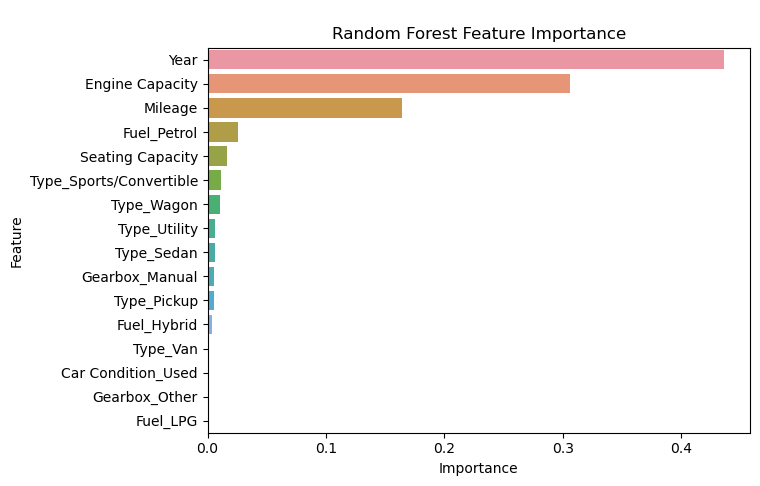


XGBoost Feature Importance:

                    Feature  Importance
12                     Year        0.31
14          Engine Capacity        0.14
10              Fuel_Petrol        0.14
2   Type_Sports/Convertible        0.07
3              Type_Utility        0.07
13                  Mileage        0.05
0               Type_Pickup        0.03
4                  Type_Van        0.03
8               Fuel_Hybrid        0.03
15         Seating Capacity        0.02
5                Type_Wagon        0.02
9                  Fuel_LPG        0.02
1                Type_Sedan        0.02
7             Gearbox_Other        0.02
6            Gearbox_Manual        0.01
11       Car Condition_Used        0.01


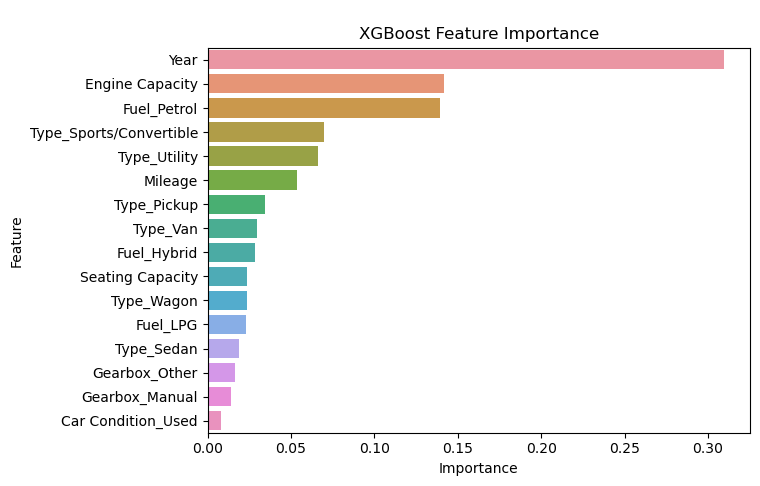

In [55]:
# Significant Features for tree-based models
for name, model in models.items():
    if name in ['Random Forest', 'XGBoost']:
        # Fit the model again for feature importance
        pipeline = Pipeline(steps=[
            ('regressor', model)
        ])
        pipeline.fit(X_train, y_train)
        
        # Extract feature names
        feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
        feature_names = list(feature_names) + numerical_features
        
        # Extract features most important
        importance = pipeline.named_steps['regressor'].feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        
        # Print and plot features most important
        print(f"\n{name} Feature Importance:\n")
        print(importance_df)
        
        plt.figure(figsize=(7, 5))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'\n{name} Feature Importance')
        plt.show()

## 5. Model 3: Classification
### Objective:
- Classify cars into price ranges (e.g., low, medium, high).
### Create price ranges using quantiles

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Create price ranges using quantiles
quantiles = cleaned_data['Price'].quantile([0.33, 0.66]).values
cleaned_data['Price_Range'] = pd.cut(cleaned_data['Price'], bins=[-float('inf'), quantiles[0], quantiles[1], float('inf')],
                                     labels=['Low', 'Medium', 'High'])

### Prepare features and target

In [59]:
# Prepare features and target
X = cleaned_data.drop(['Price', 'Price_Range'], axis=1)  # Drop the target and Price columns
y = cleaned_data['Price_Range']

# Encode categorical features using one-hot encoding
categorical_features = X.select_dtypes(include=["object"]).columns
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Train-Test Split:
- Split the dataset into training and testing sets (e.g., 80-20 split).

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

### Method for Classification:
- Use Decision Trees
- Use Naïve Bayes

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree
# Fit Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')

# Naive Bayes
# Fit Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred, average='weighted')
nb_recall = recall_score(y_test, nb_y_pred, average='weighted')

# Random Forest
# Fit Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')

### Evaluation of methods:
- Evaluate accuracy, precision, and recall metrics.

In [65]:
# Create a DataFrame for comparing the methods
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [dt_accuracy, nb_accuracy, rf_accuracy],
    'Precision': [dt_precision, nb_precision, rf_precision],
    'Recall': [dt_recall, nb_recall, rf_recall]
})

# Display comparison
print(comparison_df)

           Model  Accuracy  Precision  Recall
0  Decision Tree      0.83       0.83    0.83
1    Naive Bayes      0.40       0.69    0.40
2  Random Forest      0.86       0.86    0.86


- Best Model Selection:
    -  Decision Tree:
        -  Accuracy: 0.83 — This indicates that the model correctly classified 83% of the test instances.
        -  Precision: 0.83 — The model is quite good at identifying true positive predictions compared to all positive predictions.
        -  Recall: 0.83 — The model also does well in identifying all actual positive cases, with 83% of them correctly classified.
    -  Naive Bayes:
        -  Accuracy: 0.40 — The Naive Bayes model is underperforming, with only 40% of the test instances correctly classified.
        -  Precision: 0.69 — This suggests that when the Naive Bayes model predicts a positive outcome, it is correct 69% of the time, 
            which is relatively higher than its recall.
        -  Recall: 0.40 — The recall is very low, meaning that the Naive Bayes model is missing a large number of actual positive cases.
    - Random Forest
      -  Accuracy: 0.86 —   very strogn model 
      -  Precision: 0.86 —  The model is  good at identifying true positive predictions compared to all positive predictions.
      -  Recall: 0.86 —  The model also does well in identifying all actual positive cases, with 86% of them correctly classified.
- Conclusion:
    - The Decision Random Forest  is performing much better across all metrics than the Other  models. It has a much higher accuracy, precision, 
            and recall, making it the better choice for this classification task.    

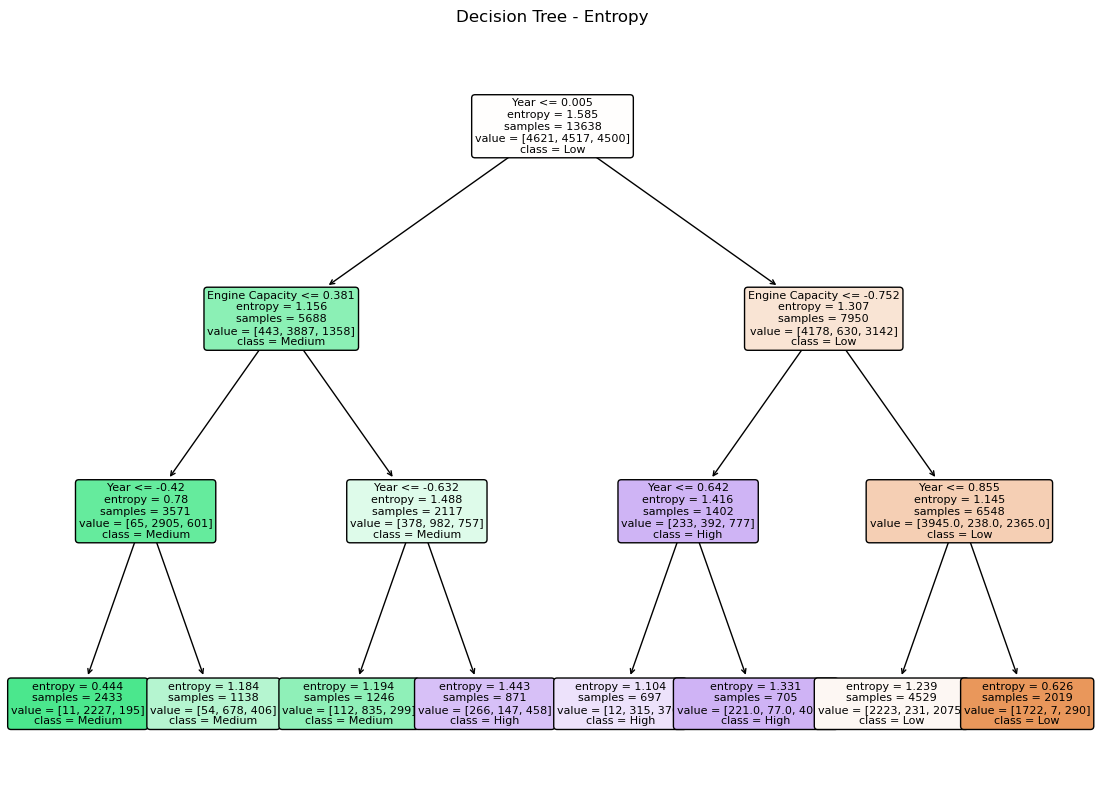

Decision Tree Accuracy: 0.6499
Decision Tree Confusion Matrix:
[[1010   33  132]
 [  65  922  125]
 [ 612  227  284]]


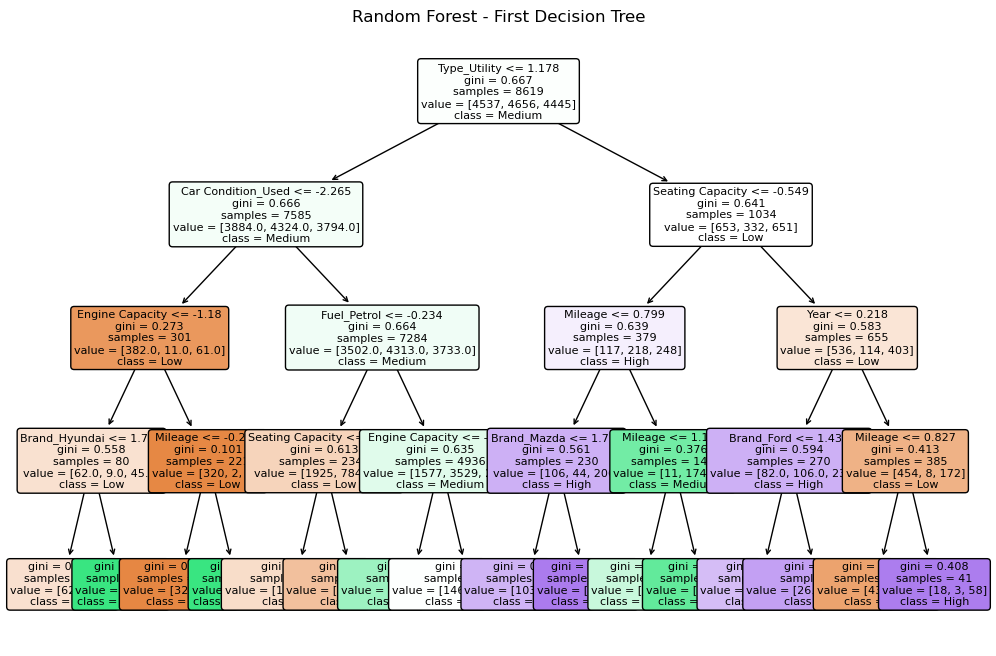

Random Forest Accuracy: 0.7405
Random Forest Confusion Matrix:
[[1003   67  105]
 [  17  963  132]
 [ 308  256  559]]


In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = ['Brand', 'Year', 'Mileage', 'Type', 'Gearbox', 'Fuel', 'Car Condition', 'Engine Capacity', 'Seating Capacity']

# Define the features (X) and target (y)
X = cleaned_data[features]
y = cleaned_data['Price_Range']

# Encode categorical variables using One-Hot Encoding
X = pd.get_dummies(X, columns=['Brand', 'Type', 'Gearbox', 'Fuel', 'Car Condition'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to improve model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

# Make predictions and calculate accuracy and confusion matrix for the Decision Tree
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_conf_matrix = confusion_matrix(y_test, dtree_pred)

# Plot the Decision Tree with smaller font size
plt.figure(figsize=(14, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree - Entropy")
plt.show()

# Print Decision Tree accuracy and confusion matrix
print(f"Decision Tree Accuracy: {dtree_accuracy:.4f}")
print("Decision Tree Confusion Matrix:")
print(dtree_conf_matrix)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Make predictions and calculate accuracy and confusion matrix for the Random Forest
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Plot a single tree from the Random Forest with smaller font size
plt.figure(figsize=(12, 8))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True, fontsize=8)
plt.title("Random Forest - First Decision Tree")
plt.show()

# Print Random Forest accuracy and confusion matrix
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)


## 6. Final Conclusion
The project successfully analyzed the Australian car market dataset and identified key factors influencing car prices. Through EDA and modeling, 
Year, Mileage, and Engine Capacity emerged as the most significant predictors of car price.

Among the models evaluated:

- XGBoost was the most robust for regression tasks, achieving the highest R² and lowest error metrics.
- Decision Trees were the best for classification, correctly categorizing cars into price ranges with high accuracy, precision, and recall.
  
Clustering analysis added value by segmenting cars into meaningful groups, aiding market targeting and pricing strategies. The integration of multiple methods—EDA, clustering, regression, and classification—provided a holistic view of the dataset and addressed the project’s objectives effectively.